Rotation and translation of images are the most fundamental operations in image editing. Both fall under a broader class of affine transformation. Affine transformation is a linear mapping method that preserves straight lines and parallelism. In other words, sets of parallel lines remain parallel after an affine transformation. Mathematically speaking, a transformation can be expressed as the form of matrix multiplication (linear combination) followed by vector addition (translation) as follows:

$$\begin{pmatrix}
x' \\
y'
\end{pmatrix} = M \begin{pmatrix}
x \\
y \\
1 
\end{pmatrix}$$

where $\begin{pmatrix}
x' \\
y'
\end{pmatrix}$ is the resulting transformed pixel coordinates, while $\begin{pmatrix}
x \\
y \\
1 
\end{pmatrix}$ is the original pixel coordinates. From a practical standpoint, we have to define $M$ to perform 2D transformation. So, how to express the rotation and translation matrix?

$$M_{translate} = \begin{pmatrix}
1 & 0 & t_x \\
0 & 1 & t_y 
\end{pmatrix}$$

$$M_{rotate} = \begin{pmatrix}
\cos(\theta) & \sin(\theta) & (1 - \cos(\theta))x_0 - y_0\sin(\theta) \\
-\sin(\theta) & \cos(\theta) & x_0\sin(\theta) + (1 - \cos(\theta))y_0
\end{pmatrix}$$

$t_x$ and $t_y$ are the shift in x and y directions respectively. Positive $t_x$ denotes moving to the right; positive $t_y$ means moving downwards. $x_0$ and $y_0$ are the centers of rotation. 

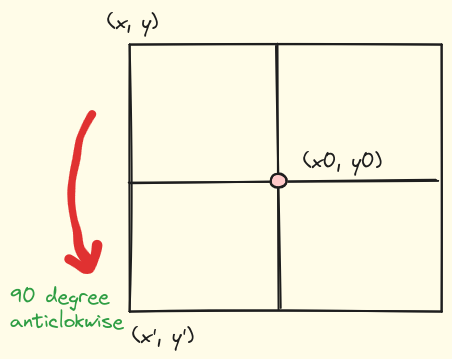

If we do the math with the formula above, we will get $x'=x_0-y_0$ and $y'=x_0+y_0$. Thus the original pixel at $(0, 0)$ is shifted to $(0, height)$.

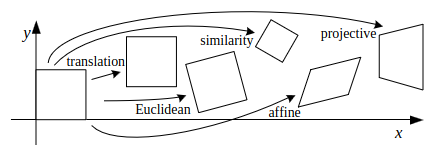

# Translation

In [2]:
import cv2 as cv
import numpy as np

img = cv.imread("images/road.jpeg")
h, w = img.shape[:2]

# define translation matrix
tx = 50
ty = 50
# make sure that the transformation is of floating number data type
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w, h))

img_combined = np.hstack((img, dst))
cv.namedWindow("transform", cv.WINDOW_NORMAL)
cv.imshow("transform", img_combined)
cv.waitKey(0)
cv.destroyAllWindows()

Some bottom and right edges of the image is permanently lost after transformation.

In [3]:
M_inv = np.float32([[1, 0, -tx], [0, 1, -ty]])
img_inv = cv.warpAffine(dst, M_inv, (w, h))

img_combined = np.hstack((img, img_inv))
cv.namedWindow("transform", cv.WINDOW_NORMAL)
cv.imshow("transform", img_combined)
cv.waitKey(0)
cv.destroyAllWindows()

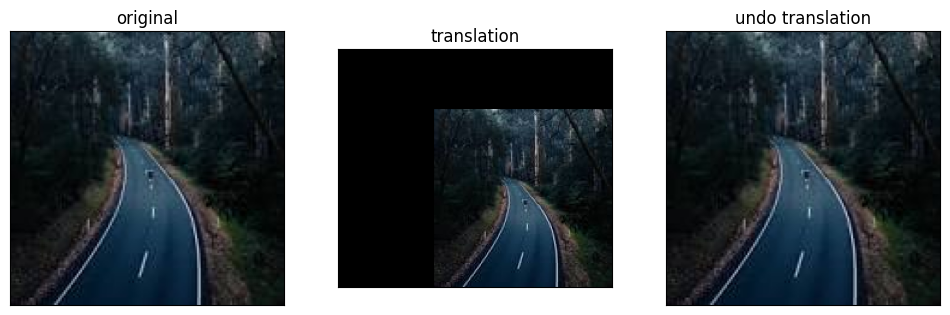

In [4]:
import matplotlib.pyplot as plt

img = cv.imread("images/road.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
h, w = img.shape[:2]

tx = 80
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
dst = cv.warpAffine(img, M, (w+tx, h+ty))

M_inv = np.float32([[1, 0, -tx], [0, 1, -ty]])
img_inv = cv.warpAffine(dst, M_inv, (w, h))

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(img), plt.title("original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dst), plt.title("translation"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inv), plt.title("undo translation"), plt.xticks([]), plt.yticks([])
plt.show()

# Rotation

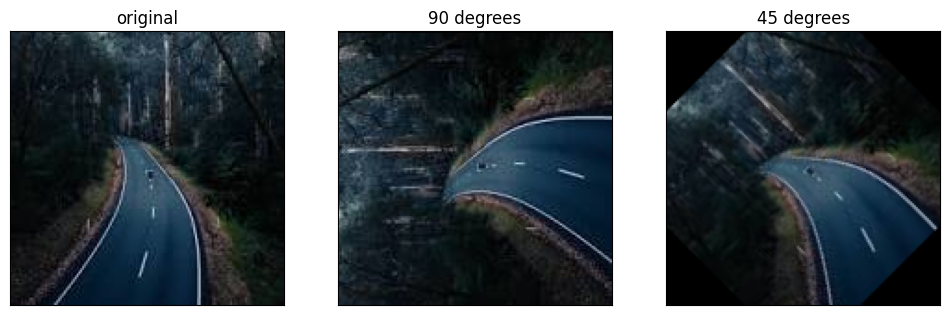

In [5]:
img = cv.imread("images/road.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
h, w = img.shape[:2]

# define rotation matrix
rotAngle = 90
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, rotAngle, 1)

dst_90 = cv.warpAffine(img, M, (w, h))
# 45 degree
rotAngle = 45
M = cv.getRotationMatrix2D(center, rotAngle, 1)

dst_45 = cv.warpAffine(img, M, (w, h))

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(img), plt.title("original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dst_90), plt.title("90 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dst_45), plt.title("45 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

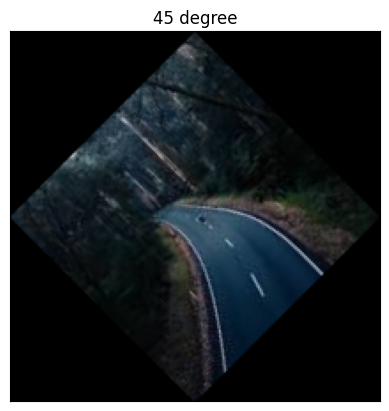

In [6]:
def rotate_img(img, angle, scale=1):
    size_reverse = np.array(img.shape[1::-1])
    M = cv.getRotationMatrix2D(tuple(size_reverse / 2), angle, scale)
    MM = np.absolute(M[:, :2])
    size_new = MM @ size_reverse
    M[:, 2] += (size_new - size_reverse) / 2
    return cv.warpAffine(img, M, tuple(size_new.astype(int)))

dst_45 = rotate_img(img, 45)
plt.imshow(dst_45), plt.title("45 degree"), plt.xticks([]), plt.yticks([])
plt.show()

# similarity transform (rotation with scaling)

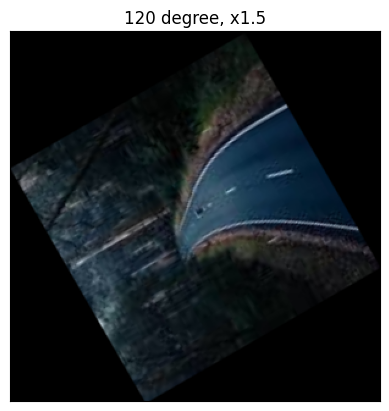

In [7]:
dst_120 = rotate_img(img, 120, 1.5)

plt.imshow(dst_120), plt.title("120 degree, x1.5"), plt.xticks([]), plt.yticks([])
plt.show()